In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


What do columns actually mean?

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000usd

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

In [5]:
x = df
y = boston.target

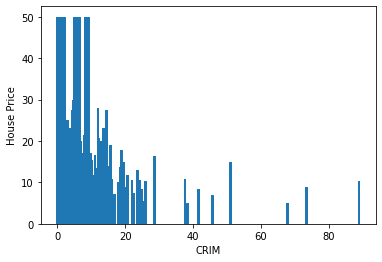

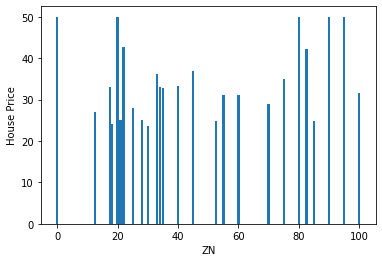

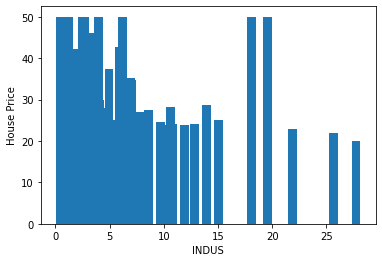

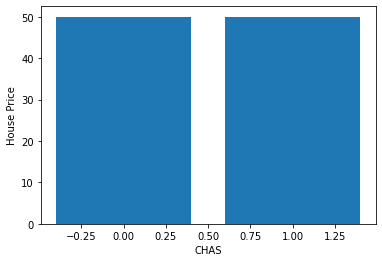

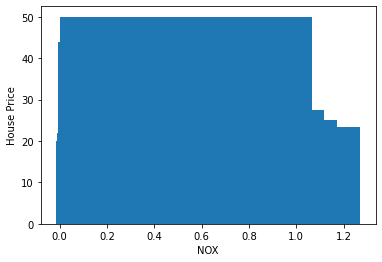

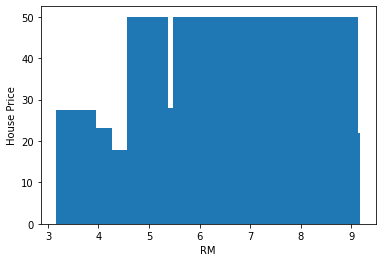

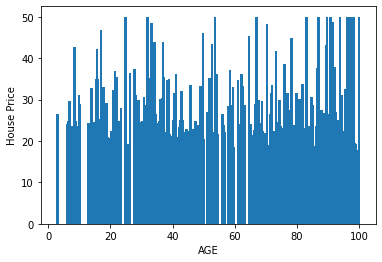

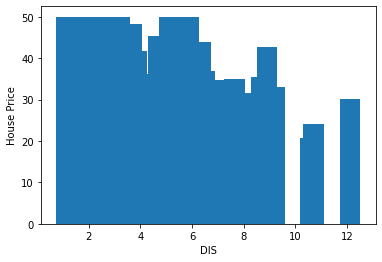

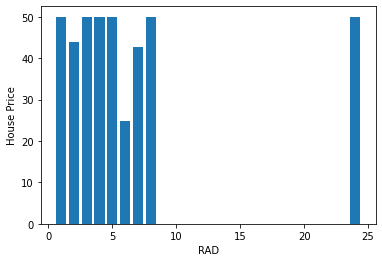

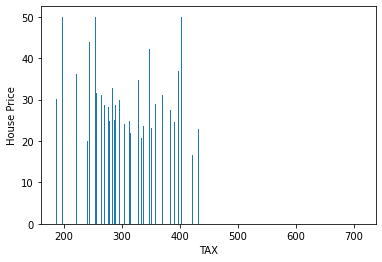

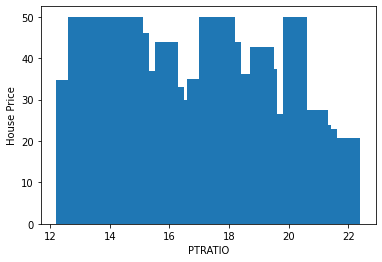

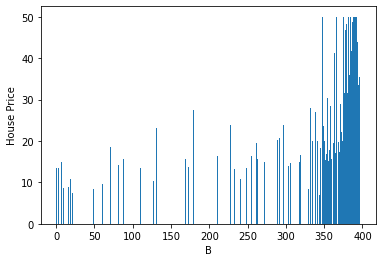

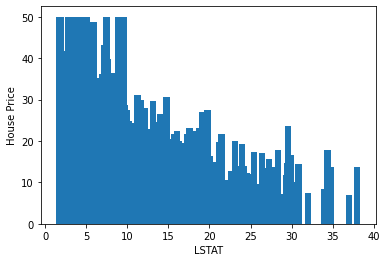

In [6]:
col_len = len(boston.feature_names)

feature = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
           
for i in range(0, col_len):
    x_i = df[feature[i]] 
    #print(x_i)
    plt.bar(x_i, y)
    plt.xlabel(feature[i])
    plt.ylabel('House Price')
    plt.show()



In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
correlation = df.corr()

### Construct a heatmap to undestand Correlations with columns


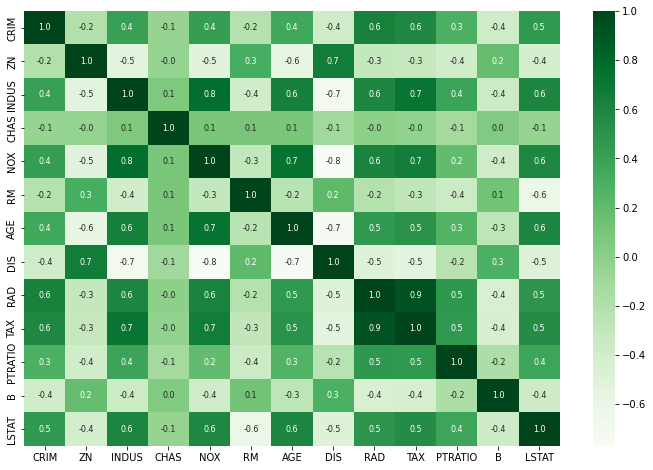

In [9]:
plt.figure(figsize=(12,8))
_ = sns.heatmap(correlation, cbar=True, annot=True, fmt='.1f', annot_kws={'size':8}, cmap='Greens')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Training

- **XGBoost Regressor**

In [11]:
## Load the Model
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [12]:
## Training the model
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

## Evaluation Accuracy

### **Evaluation for the Train data**

In [13]:
## Accuracy for prediction on training data
pred_data = xgb_model.predict(x_train)

In [14]:
# R squared Error 
score_1 = metrics.r2_score(y_train, pred_data)

# MEA - mean absolute error
score_2 = metrics.mean_absolute_error(y_train, pred_data)

# MSE - Mean squared error
score_3 = metrics.mean_squared_error(y_train, pred_data)

# RMSE - Root mean squared error
score_4 = np.sqrt(metrics.mean_squared_error(y_train, pred_data))

print("R squared Error", score_1)
print("Mean Absolute Error", score_2)
print('MSE:', score_3)
print('RMSE:', score_4)

R squared Error 0.9999953622164942
Mean Absolute Error 0.013965251658222466
MSE: 0.0004029000393923251
RMSE: 0.02007237004920757


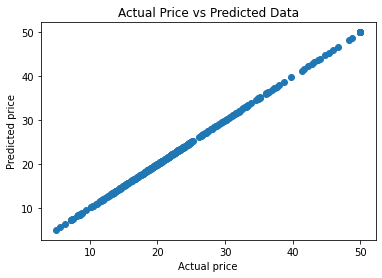

In [15]:
_ = plt.scatter(y_train, pred_data)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted Data')
plt.show()

### **Evaluation for the Test Data**

In [16]:
#Predicting Test data with the model
pred_data = xgb_model.predict(x_test)

In [17]:
# R squared Error 
score_1 = metrics.r2_score(y_test, pred_data)

# MEA - mean absolute error
score_2 = metrics.mean_absolute_error(y_test, pred_data)

# MSE - Mean squared error
score_3 = metrics.mean_squared_error(y_test, pred_data)

# RMSE - Root mean squared error
score_4 = np.sqrt(metrics.mean_squared_error(y_test, pred_data))

print("R squared Error", score_1)
print("Mean Absolute Error", score_2)
print('MSE:', score_3)
print('RMSE:', score_4)

R squared Error 0.9105388132305845
Mean Absolute Error 1.9574996602301502
MSE: 6.560527271813469
RMSE: 2.561352625433185


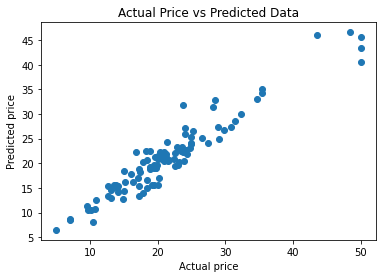

In [18]:
_ = plt.scatter(y_test, pred_data)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price vs Predicted Data')
plt.show()

In [19]:
pred_data

array([23.25328  , 30.024755 , 15.632249 , 23.313478 , 17.775118 ,
       21.142563 , 20.19583  , 15.010124 , 21.23614  , 22.242369 ,
       20.457346 , 19.209145 ,  8.551788 , 21.210636 , 20.696491 ,
       26.74365  , 18.824339 , 10.525872 , 45.68885  , 14.116162 ,
       26.618996 , 24.94542  , 13.3510275, 20.87231  , 15.400073 ,
       15.636547 , 22.324673 , 12.777009 , 20.726126 , 22.56401  ,
       20.346395 , 22.303246 , 18.523277 , 21.764612 , 15.568828 ,
       15.683646 , 33.073547 , 19.115112 , 21.955132 , 22.399914 ,
       18.998787 , 31.328337 , 43.464993 , 18.20766  , 22.09233  ,
       14.353467 , 14.607512 , 22.716745 , 19.700527 , 27.072327 ,
       22.579268 , 35.133675 , 16.241447 , 25.214682 , 46.013332 ,
       21.89786  , 15.043295 , 32.93268  , 20.53731  , 16.568089 ,
       24.07178  , 34.34796  , 28.542194 , 16.977676 , 25.867334 ,
       15.649837 , 13.039615 , 23.00082  , 27.26897  , 15.414835 ,
       21.546648 , 31.72919  , 10.665012 , 20.770847 , 21.8483

In [20]:
data = {
    'price' : pred_data
}
submission = pd.DataFrame(data)

In [21]:
submission.to_csv('submission_xgb.csv', index=False)